# Dataset Preview

### Notebook utilizado para pré visualização dos dados de exame

### Pacotes Utilizados:

In [ ]:
%pip install mne

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

#Definindo padrões de plot domínio do tempo
plot_kwargs = {
    'scalings': dict(eeg=20e-5),
    'show_scrollbars': False,
}

In [ ]:
import database.databaseutils as db
import model.summarymodelconverter as converter

db.connect()

db_object = db.summary_by_name('chb01_03.edf')
summary_model = converter.model_from_tuple( db_object )
summary_model.compute_mne_objects()

In [4]:
summary_model.time_data

<RawEDF | chb01_03.edf, 19 x 921600 (3600.0 s), ~23 kB, data not loaded>

Using matplotlib as 2D backend.


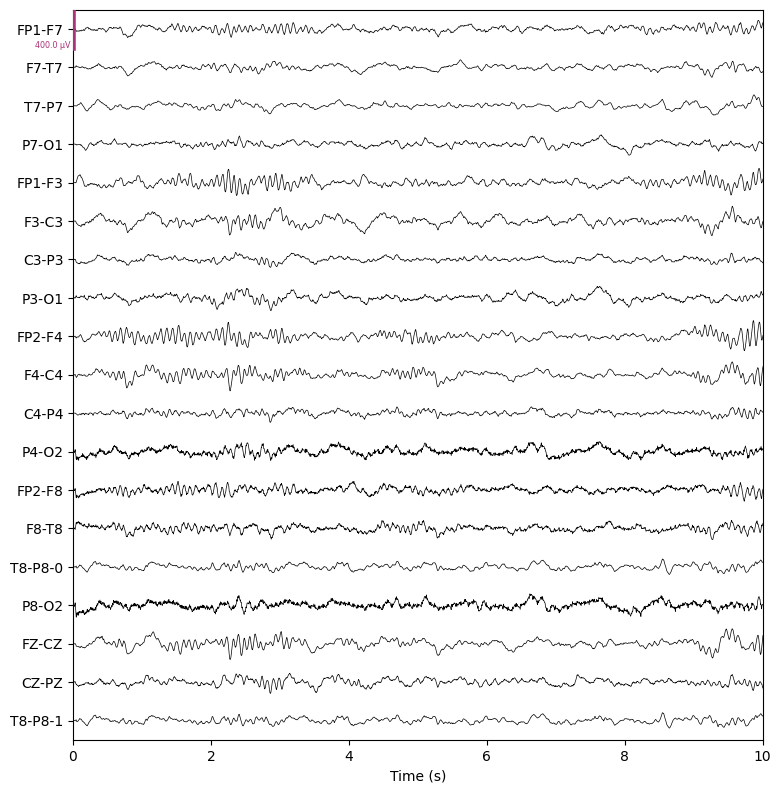

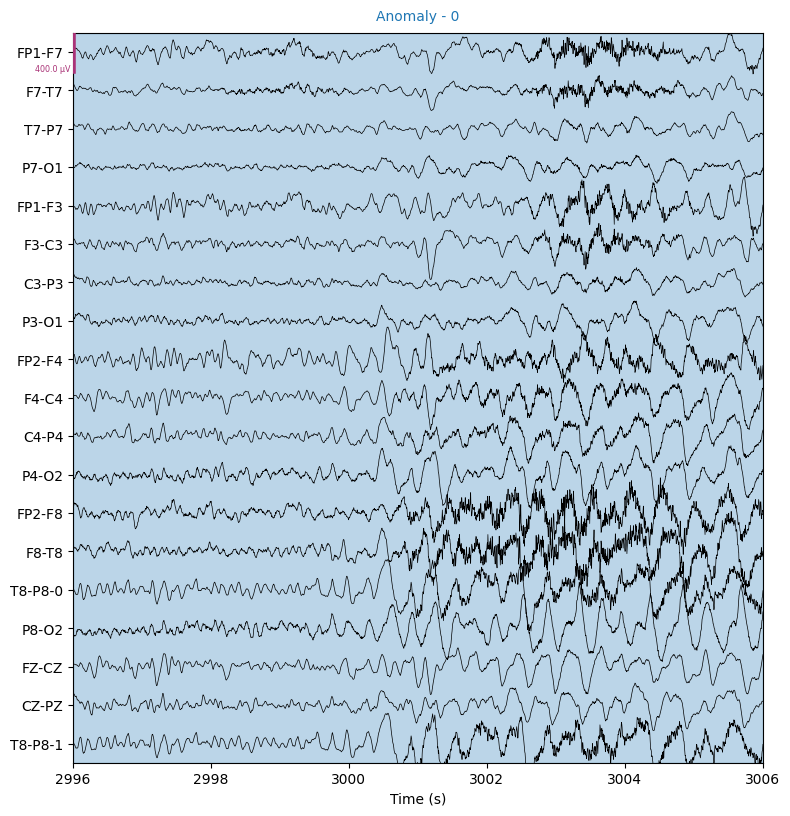

In [5]:
summary_model.time_data.plot(start=0, **plot_kwargs);
summary_model.time_data.plot(start=summary_model.start_time_of_seizure(1), **plot_kwargs);

In [6]:
summary_model.psd_data

Data type,Power Spectrum
Units,eeg: V²/Hz
Data source,Raw
Dims,"channel, freq"
Estimation method,welch
Number of channels,19
Number of frequency bins,1025
Frequency range,0.00 – 128.00 Hz


/tmp/ipykernel_18887/3984909603.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  summary_model.psd_data.plot();
/home/luiz/.local/lib/python3.8/site-packages/mne/viz/utils.py:161: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


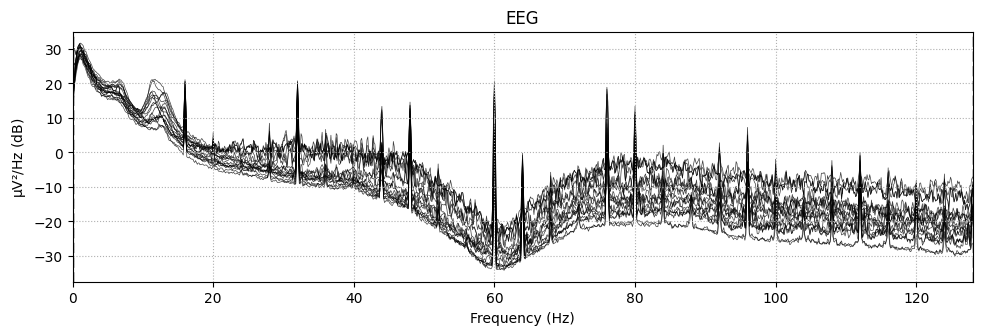

In [7]:
summary_model.psd_data.plot();

In [8]:
import re

summary_model_renamed = converter.model_from_tuple( db_object )
summary_model_renamed.compute_mne_objects(True)

Extracting EDF parameters from /home/luiz/Documentos/Mestrado/eeg-anomaly-detection/data/chb01/chb01_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Effective window size : 8.000 (s)


/home/luiz/Documentos/Mestrado/eeg-anomaly-detection/reader/reader.py:27: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  mne_model = mne.io.read_raw_edf(summary_model.fullpath(), include=selected_channels())


In [9]:
summary_model_renamed.time_data

<RawEDF | chb01_03.edf, 16 x 921600 (3600.0 s), ~28 kB, data not loaded>

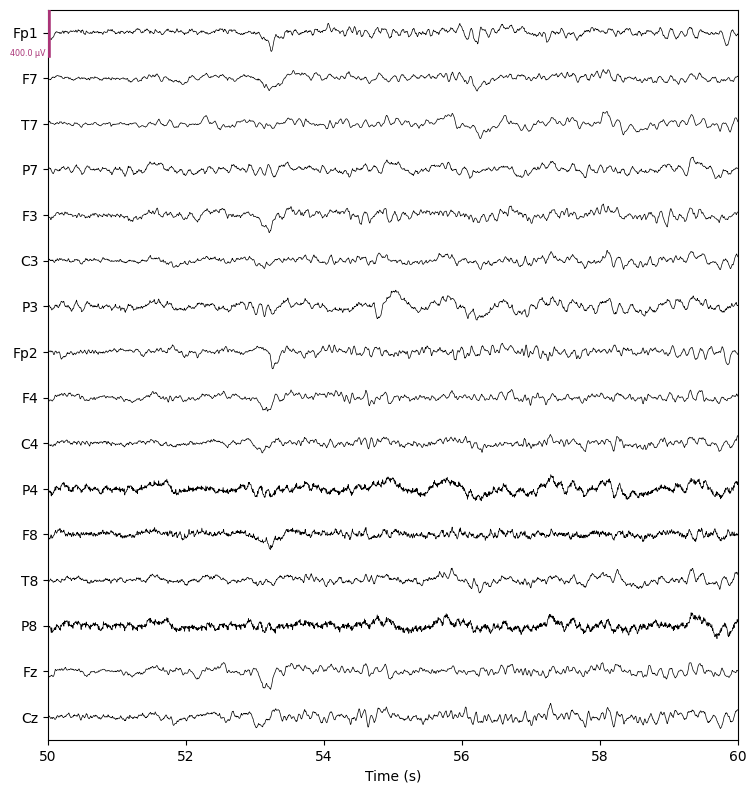

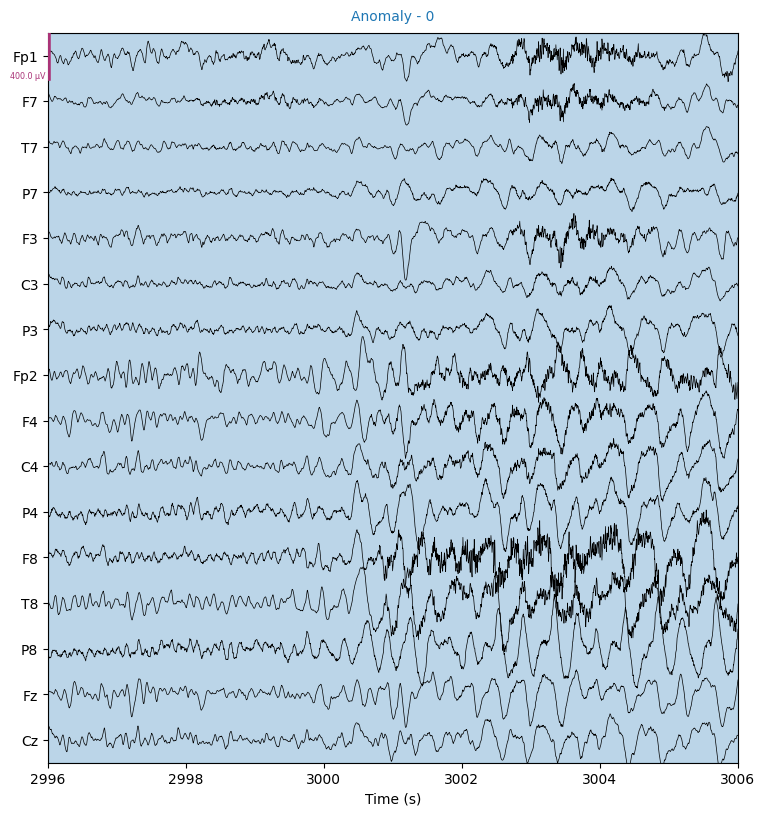

In [10]:
summary_model_renamed.time_data.plot(start = 50, **plot_kwargs);
summary_model_renamed.time_data.plot(start=summary_model.start_time_of_seizure(1), **plot_kwargs);

In [11]:
summary_model_renamed.psd_data

Data type,Power Spectrum
Units,eeg: V²/Hz
Data source,Raw
Dims,"channel, freq"
Estimation method,welch
Number of channels,16
Number of frequency bins,1025
Frequency range,0.00 – 128.00 Hz


/home/luiz/.local/lib/python3.8/site-packages/mne/viz/utils.py:161: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


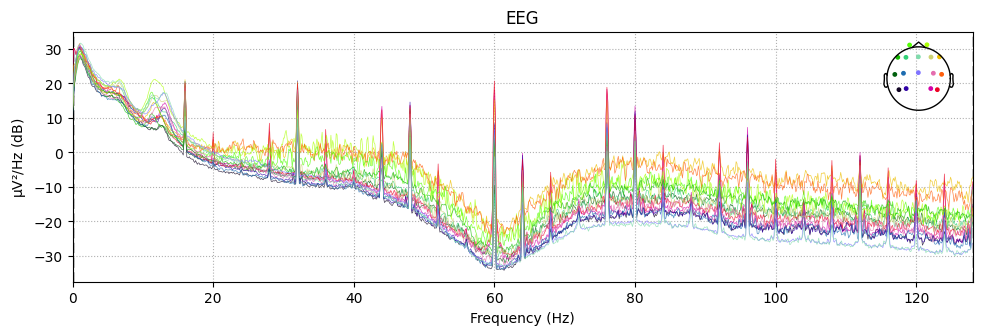

In [12]:
summary_model_renamed.psd_data.plot();